Import packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D


Import data and check that the dimensions are correct. Here 'data'is the matrix of samples-by-96 substitution classes, 'types'are the char strings for cancer types in the order of the samples, 'numtypes' are their numeric labels 1-27 in the order given by the dataframe 'possible_types'. 

In [2]:
data = open('csc.csv', 'rt')
data = np.loadtxt(data, delimiter=",")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(data.shape)
types = pd.read_csv('types.csv',header=None)
print(types.shape)
numtypes = open('types_numeric.csv', 'rt')
numtypes = np.loadtxt(numtypes, delimiter=",")
print(numtypes.shape)
possible_types = pd.read_csv('possible_types.csv',header=None)
print(possible_types.shape)

(6754, 96)
(6754, 1)
(6754,)
(27, 1)


As a reminder: PCA on substitution class vectors directly (or on centered vectors) does not yield clusters and is dominated by outliers.

explained_variance_ratio:
[ 0.09793888  0.05990145]


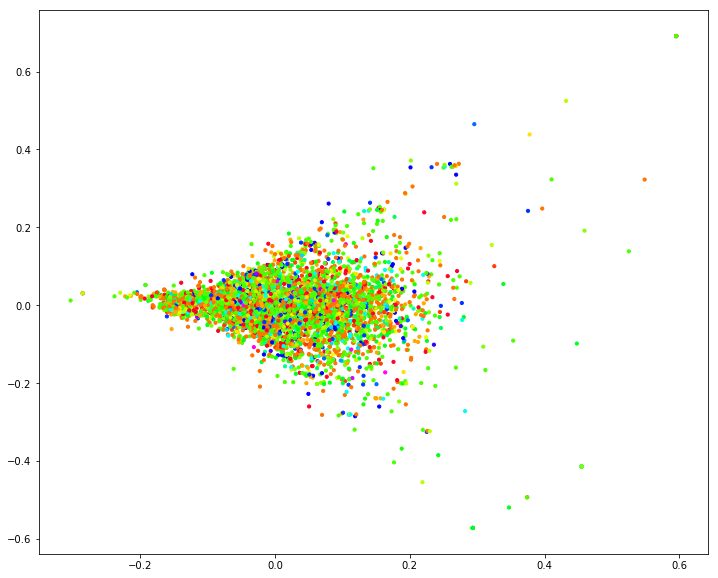

In [3]:
pca1 = decomposition.PCA(n_components=2)
pca1.fit(data)
X1 = pca1.transform(data)
print "explained_variance_ratio:"
print(pca1.explained_variance_ratio_) 
plt.rcParams['figure.figsize'] = (12,10)
normcolors = matplotlib.colors.Normalize(vmin=1.0, vmax=27.0)
plt.scatter(X1[:, 0], X1[:, 1], c=normcolors(numtypes),cmap=plt.cm.gist_rainbow, s=10)
plt.show()

Standard scaling to unit variance makes a difference

explained_variance_ratio:
[ 0.02425625  0.02137727]


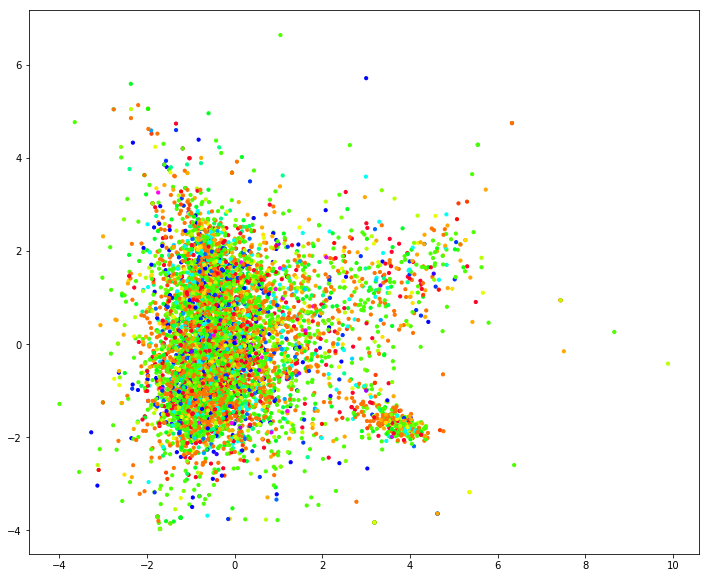

In [4]:
pca1s = decomposition.PCA(n_components=2);
pca1s.fit(scaled_data);
X1s = pca1s.transform(scaled_data);
print "explained_variance_ratio:"
print(pca1s.explained_variance_ratio_);
plt.rcParams['figure.figsize'] = (12,10);
normcolors = matplotlib.colors.Normalize(vmin=1.0, vmax=27.0)
plt.scatter(X1s[:, 0], X1s[:, 1], c=normcolors(numtypes), cmap=plt.cm.gist_rainbow, s=10);
plt.show();

Let's look at the cluster in the lower right corner more closely:

number of samples in this cluster:
304


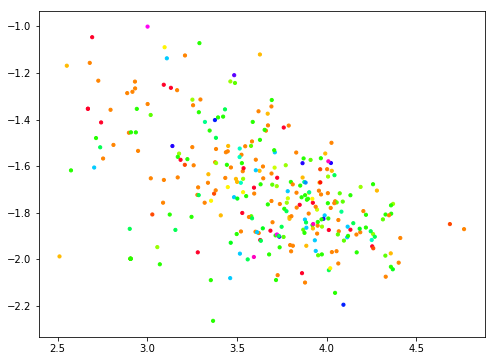

In [5]:
x=X1s[:,0];
y=X1s[:,1];
xind= np.where([(x >= 2.5) & (x < 5.0) ]);
xind=xind[1];
yind= np.where([(y > -2.5) & (y < -1.0)]);
yind=yind[1];
ind=np.array(list(set(xind).intersection(yind)));
print "number of samples in this cluster:"
print len(ind)
plt.rcParams['figure.figsize'] = (8,6)
normcolors = matplotlib.colors.Normalize(vmin=1.0, vmax=27.0)
plt.scatter(X1s[ind, 0], X1s[ind, 1], c=normcolors(numtypes[ind]), cmap=plt.cm.gist_rainbow, s=10);
plt.show();

The mean profile in this cluster resembles the mutational signature number 7 in Cosmic database: 

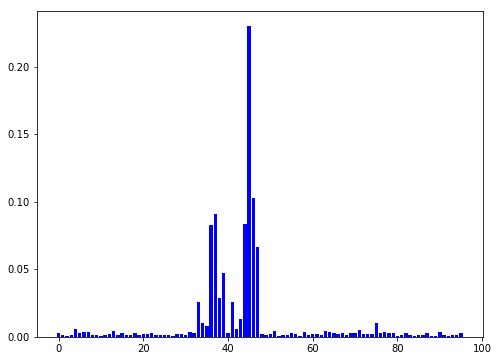

In [6]:
clusterprofile=sum(data[ind,:])/sum(sum(data[ind,:]))
plt.bar(np.arange(96),clusterprofile, color='b')
plt.show()

Two cancer types are more abundant than the others in this cluster:

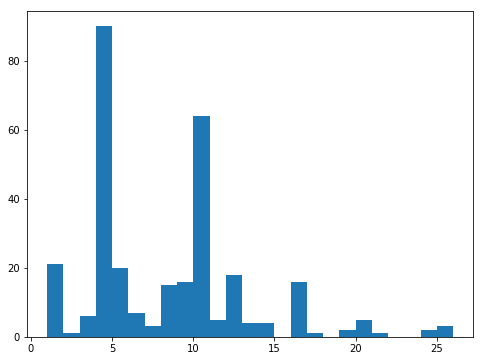

Two highest numbers in this cluster:
90
64


In [7]:
plt.hist(numtypes[ind], bins=np.arange(1,27,1));
plt.show()
print "Two highest numbers in this cluster:"
print sum(numtypes[ind]==4)
print sum(numtypes[ind]==10)

They are cancer types 4 and 10 (3 and 9 in python indexing), i.e. melanoma and colorectal cancers, exactly as described in the Cosmic db for signature 7. A coincidence?

In [8]:
print possible_types.iloc[3];
print possible_types.iloc[9];

0    SKCM
Name: 3, dtype: object
0    COAD/READ
Name: 9, dtype: object


3rd component of pca does not reveal further clusters

explained_variance_ratio:
[ 0.02425625  0.02137727]


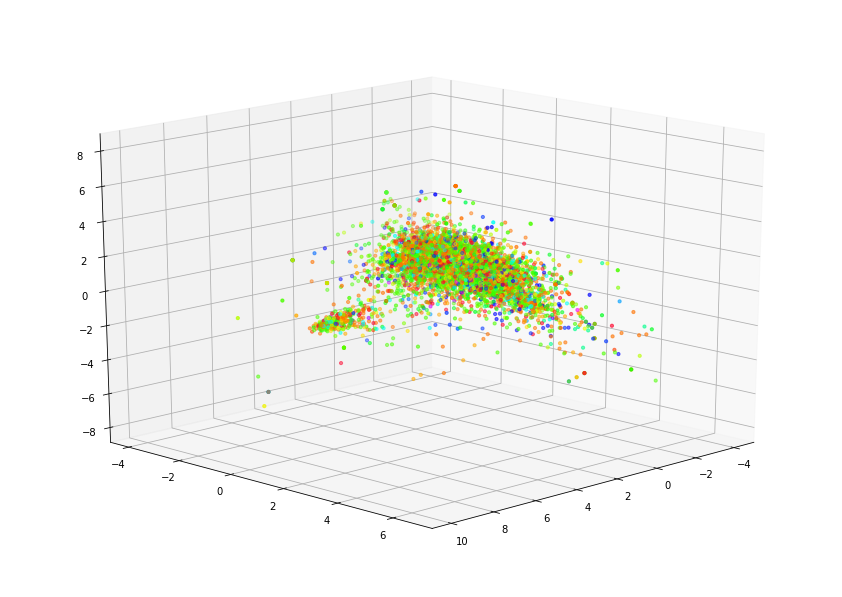

In [9]:
pca2 = decomposition.PCA(n_components=3);
pca2.fit(scaled_data);
X2 = pca2.transform(scaled_data);
print "explained_variance_ratio:"
print(pca1s.explained_variance_ratio_);
fig = plt.figure(1, figsize=(12, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=18, azim=45)
plt.rcParams['figure.figsize'] = (10,7);
normcolors = matplotlib.colors.Normalize(vmin=1.0, vmax=27.0)
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=normcolors(numtypes), cmap=plt.cm.gist_rainbow, s=10)
plt.show();